In [39]:
# LABORATORIO 2
# DATASET DE LINO
# MIRANDA GUTIERREZ CESAR ALVARO
import os
import numpy as np
from matplotlib import pyplot
# Necesario para graficar superficies
from mpl_toolkits.mplot3d import Axes3D
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
#importa pandas, es una biblioteca para manipular datos
import pandas as pd
#encoder para transformar etiquetas categoricas a numericas
from sklearn.preprocessing import LabelEncoder
#import datetime for working with dates and times.
from datetime import datetime

In [4]:
#Carga de dataset
#data panda.leer csv o tambien puedes ser txt.
data = pd.read_csv('/content/Clean_Dataset.csv')

In [5]:
print(data)

           nro    airline   flight source_city departure_time stops  \
0            0   SpiceJet  SG-8709       Delhi        Evening  zero   
1            1   SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2            2    AirAsia   I5-764       Delhi  Early_Morning  zero   
3            3    Vistara   UK-995       Delhi        Morning  zero   
4            4    Vistara   UK-963       Delhi        Morning  zero   
...        ...        ...      ...         ...            ...   ...   
142043  142043    Vistara   UK-708     Kolkata          Night   one   
142044  142044    Vistara   UK-738     Kolkata        Evening   one   
142045  142045   GO_FIRST   G8-102     Kolkata      Afternoon   one   
142046  142046  Air_India   AI-402     Kolkata        Morning   one   
142047  142047  Air_India   AI-402     Kolkata        Morning   one   

         arrival_time destination_city    class  duration  days_left   price  
0               Night           Mumbai  Economy      2.17        1.0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142048 entries, 0 to 142047
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   nro               142048 non-null  int64  
 1   airline           142048 non-null  object 
 2   flight            142048 non-null  object 
 3   source_city       142048 non-null  object 
 4   departure_time    142048 non-null  object 
 5   stops             142048 non-null  object 
 6   arrival_time      142048 non-null  object 
 7   destination_city  142048 non-null  object 
 8   class             142047 non-null  object 
 9   duration          142047 non-null  float64
 10  days_left         142047 non-null  float64
 11  price             142047 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 13.0+ MB


In [7]:
#variables categoricas, contiene las listas de las columnas de data que tienen tipo de dato object.
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [8]:
for columna in columnas_categoricas:
  #usa labelencoder para crear objeto llamado le, que permite transformar valores categoricos a enteros.
  le = LabelEncoder()
  # usa lift_transform del objeto le para ajustar el codificador a los valores de la columna y devolver una serie d enumero enteros
  data[columna] = le.fit_transform(data[columna])

In [9]:
print(data)

           nro  airline  flight  source_city  departure_time  stops  \
0            0        4    1100            1               2      2   
1            1        4    1079            1               1      2   
2            2        0     939            1               1      2   
3            3        5    1232            1               4      2   
4            4        5    1222            1               4      2   
...        ...      ...     ...          ...             ...    ...   
142043  142043        5    1135            2               5      0   
142044  142044        5    1140            2               2      0   
142045  142045        2     688            2               0      0   
142046  142046        1     505            2               4      0   
142047  142047        1     505            2               4      0   

        arrival_time  destination_city  class  duration  days_left   price  
0                  5                 6      0      2.17        1.0  59

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142048 entries, 0 to 142047
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   nro               142048 non-null  int64  
 1   airline           142048 non-null  int64  
 2   flight            142048 non-null  int64  
 3   source_city       142048 non-null  int64  
 4   departure_time    142048 non-null  int64  
 5   stops             142048 non-null  int64  
 6   arrival_time      142048 non-null  int64  
 7   destination_city  142048 non-null  int64  
 8   class             142048 non-null  int64  
 9   duration          142047 non-null  float64
 10  days_left         142047 non-null  float64
 11  price             142047 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 13.0 MB


In [11]:
# Leer datos delimiter is the separation beetwen columns
#leer lod datos desde columna 0 hasta antes de columna 2 y para 'y' desde 0,1,2
X = data.iloc[:, :11]
#la fila 12 en este caso seria 'y'
y = data.iloc[:, 11]
m = y.size


In [34]:
print(X)
print('-'*26)
print(y)

           nro  airline  flight  source_city  departure_time  stops  \
0            0        4    1100            1               2      2   
1            1        4    1079            1               1      2   
2            2        0     939            1               1      2   
3            3        5    1232            1               4      2   
4            4        5    1222            1               4      2   
...        ...      ...     ...          ...             ...    ...   
142043  142043        5    1135            2               5      0   
142044  142044        5    1140            2               2      0   
142045  142045        2     688            2               0      0   
142046  142046        1     505            2               4      0   
142047  142047        1     505            2               4      0   

        arrival_time  destination_city  class  duration  days_left  
0                  5                 6      0      2.17        1.0  
1        

In [35]:
X.shape

(142048, 11)

In [14]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [15]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

           nro  airline  flight  source_city  departure_time  stops  \
0            0        4    1100            1               2      2   
1            1        4    1079            1               1      2   
2            2        0     939            1               1      2   
3            3        5    1232            1               4      2   
4            4        5    1222            1               4      2   
...        ...      ...     ...          ...             ...    ...   
142043  142043        5    1135            2               5      0   
142044  142044        5    1140            2               2      0   
142045  142045        2     688            2               0      0   
142046  142046        1     505            2               4      0   
142047  142047        1     505            2               4      0   

        arrival_time  destination_city  class  duration  days_left  
0                  5                 6      0      2.17        1.0  
1        

In [16]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

In [36]:
''' xlabel1 = "superfice terreno"
xlabel2 = "Calidad de la tierra"
ylabel1 = "Costo terreno"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2) '''

' xlabel1 = "superfice terreno"\nxlabel2 = "Calidad de la tierra"\nylabel1 = "Costo terreno"\ngraficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)\ngraficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)\ngraficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2) '

In [17]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
#print(munos.shape)
#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape

In [18]:
print(X_ready)

[[ 1.00000000e+00 -1.73203861e+00  6.75739669e-01 ... -2.65328540e-03
  -1.28193789e+00 -1.84343554e+00]
 [ 1.00000000e+00 -1.73201423e+00  6.75739669e-01 ... -2.65328540e-03
  -1.25953234e+00 -1.84343554e+00]
 [ 1.00000000e+00 -1.73198984e+00 -1.60474876e+00 ... -2.65328540e-03
  -1.28193789e+00 -1.84343554e+00]
 ...
 [ 1.00000000e+00  1.73198984e+00 -4.64504547e-01 ... -2.65328540e-03
  -3.14297950e-01  1.47736118e+00]
 [ 1.00000000e+00  1.73201423e+00 -1.03462666e+00 ... -2.65328540e-03
  -2.31677463e-01  1.47736118e+00]
 [ 1.00000000e+00  1.73203861e+00 -1.03462666e+00 ...  3.76891231e+02
              nan             nan]]


In [19]:
def calcularCosto(X_ready, y, theta):
  m = y.size
  J = 0
  #la formula de costo, hipotesis
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [21]:
print(data)

           nro  airline  flight  source_city  departure_time  stops  \
0            0        4    1100            1               2      2   
1            1        4    1079            1               1      2   
2            2        0     939            1               1      2   
3            3        5    1232            1               4      2   
4            4        5    1222            1               4      2   
...        ...      ...     ...          ...             ...    ...   
142043  142043        5    1135            2               5      0   
142044  142044        5    1140            2               2      0   
142045  142045        2     688            2               0      0   
142046  142046        1     505            2               4      0   
142047  142047        1     505            2               4      0   

        arrival_time  destination_city  class  duration  days_left   price  
0                  5                 6      0      2.17        1.0  59

In [22]:
#RELLENAR DATOS
#asignar las columnas incompletas.
columnas_especificas = ['duration', 'days_left', 'price']
#sacar la media de toda la columna y con ese valor llenar esos datos vacios.
media_columnas = data[columnas_especificas].mean()
#llenar
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142048 entries, 0 to 142047
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   nro               142048 non-null  int64  
 1   airline           142048 non-null  int64  
 2   flight            142048 non-null  int64  
 3   source_city       142048 non-null  int64  
 4   departure_time    142048 non-null  int64  
 5   stops             142048 non-null  int64  
 6   arrival_time      142048 non-null  int64  
 7   destination_city  142048 non-null  int64  
 8   class             142048 non-null  int64  
 9   duration          142048 non-null  float64
 10  days_left         142048 non-null  float64
 11  price             142048 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 13.0 MB


In [38]:
theta = np.zeros(13)
theta=np.array([1, 1, 3, 1000, 1, 2, 2, 4, 6, 0.00, 10.00, 6000.00])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

ValueError: ignored

In [31]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [340397.21258957 108735.84407295  -5866.41971213]
con un costo de: 2043503206.6600745 


Text(0, 0.5, 'Costo J')

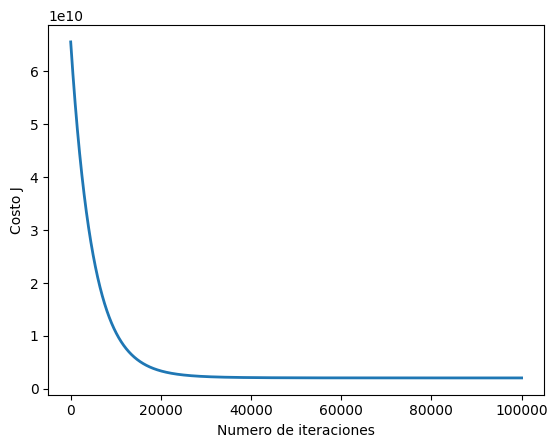

In [ ]:
#inicializar las variables

theta = np.zeros(3)
#JUGAR CON ESTOS VALORES
num_ite = 100000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

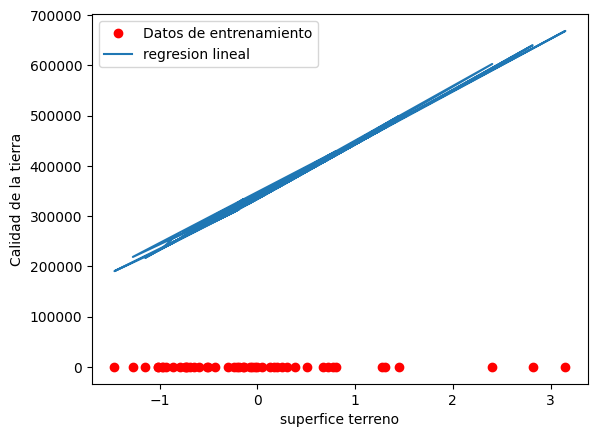

In [ ]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [ ]:
# 2300,4,449900
y_pred = np.dot([1, 2305, 4], theta)
print(y_pred)

250953052.1218971


In [ ]:
#Utilizando la ecuacion de la norma

In [ ]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [ ]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")

los valores de theta calculados son: [89597.9095428    139.21067402 -8738.01911233]


In [ ]:
X_array = [1, 2305, 4]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $375526
